# Problem

The sales team of mall store wants to understand their customers and identify patterns to help them sever better and generate more profit. They created a dataset collecting the age, gender, annual income and spending score.

To solve this problem, we perform K-Means clustering on the data and perform cluster analysis to get insights of the customers.

## Importing the libraries

In [30]:
!pip install Seaborn

  Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)


You should consider upgrading via the 'c:\users\arjuy\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')


## Part A 
First using only two features i.e. annual income and spending score, we try to find clusters and get some insights from them.

In [3]:
X = dataset.iloc[:, [3, 4]].values

## Using the elbow method to find the optimal number of clusters

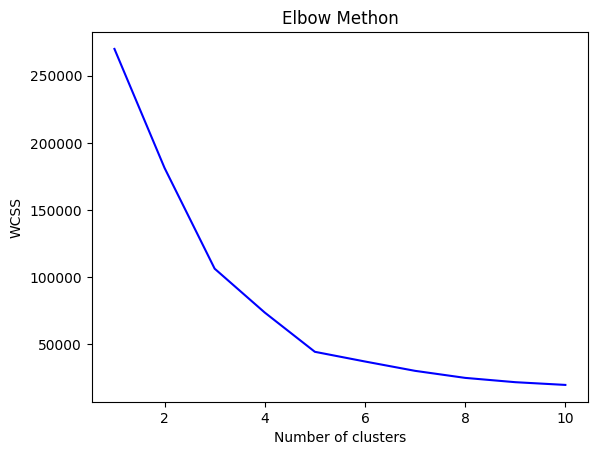

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss,color = 'blue')
plt.title("Elbow Methon")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

The optimal number of clusters here is 5, so we choose this to do the training.

## Training the K-Means model on the dataset

In [8]:
kmeans = KMeans(n_clusters=5,init='k-means++')
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters and analysis

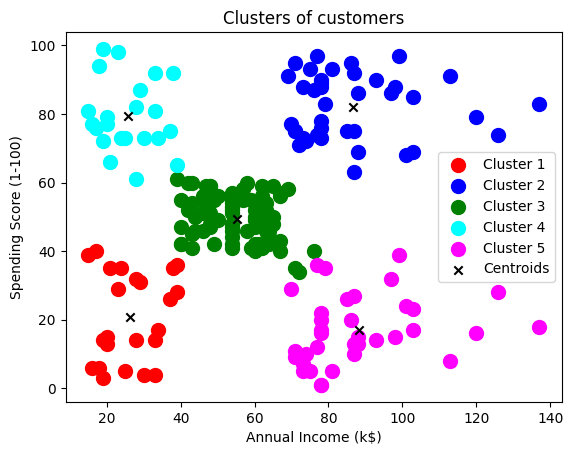

In [12]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'black',marker = 'x', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

The plot shows that cluster 2 with people with high spending score and high annual income so they can target them with some loyalty points so they will spend more. Cluster 5 are people with high income but low spending score which suggests they aren't spending much even though they can afford it, so they should be studied further to understand what is making them reluctant from spending at the mall.

## Part B
Now that we have some information, we perform clustering using all the features and do the cluster analysis to understand the customers better.

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Data Preprocessing

We don't need customerID for clustering purpose so we can exclude it. Also gender column needs to be encoded. So we will use LabelEncoder to convert it into binary labels

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['gender'] = le.fit_transform(dataset['Genre'])

In [17]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),gender
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [48]:
X = dataset.iloc[:, 2:].values

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[:,:3] = scaler.fit_transform(X[:,:3])


## Using the elbow method to find the optimal number of clusters

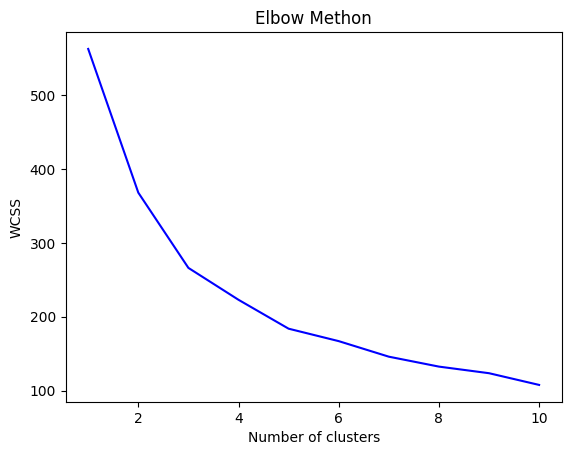

In [56]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss,color = 'blue')
plt.title("Elbow Methon")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

The optimal number of clusters here is 5, so we choose this to do the training.

## Training the K-Means model on the dataset

In [85]:
kmeans = KMeans(n_clusters=5,init='k-means++')
y_kmeans = kmeans.fit_predict(X)

## Cluster analysis

In [86]:
dataset['Clusters'] = y_kmeans

In [87]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),gender,Clusters
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,2
4,5,Female,31,17,40,0,3


<AxesSubplot:xlabel='Clusters', ylabel='count'>

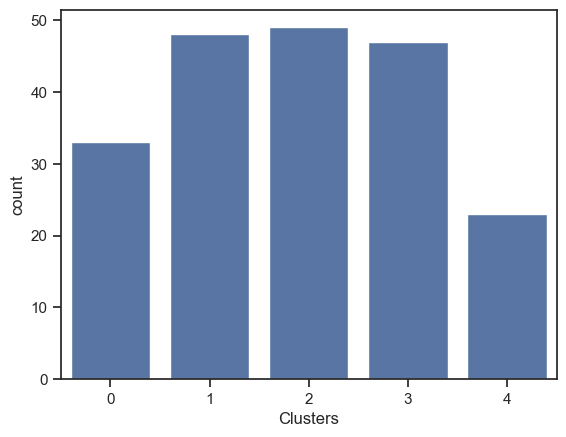

In [88]:
sns.countplot(x='Clusters', data = dataset)

In [89]:
dataset.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
gender                     int32
Clusters                   int32
dtype: object

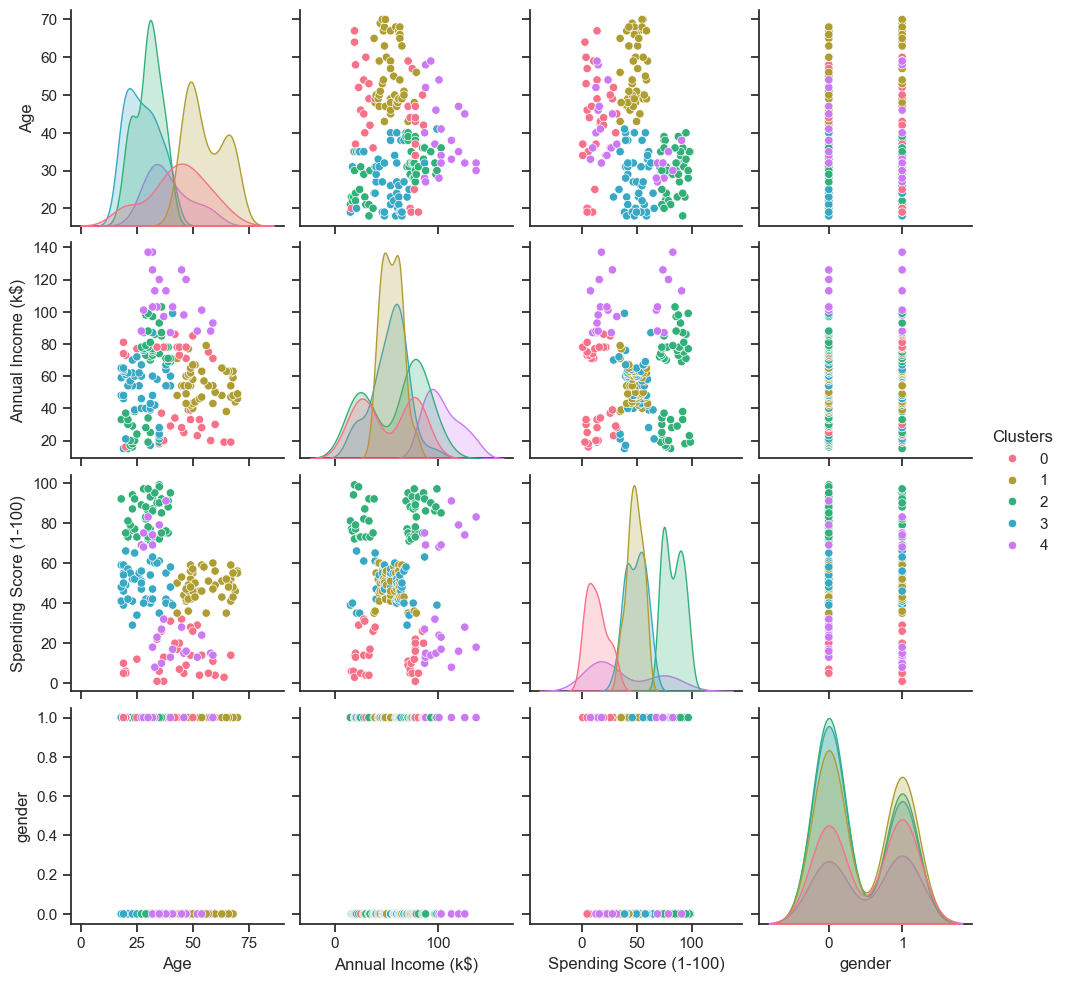

In [91]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(dataset.iloc[:,2:], hue = "Clusters", palette=sns.color_palette("husl", 5))

From the above plot it can be concluded that Cluster 1 and Cluster 3 customers can be targeted with age specific products (since cluster 3 customers falls into a younger age group even though they have high annual incomes) to help increase their spending score.
Cluster 2 has customers with high spending scores that fall mostly between age 25 to 37, therefore they can be offered loyalty programs to keep them as a long term customers.